In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install konlpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install PyPDF2

In [ ]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(file_path):
    with open(file_path, "rb") as file:
        pdf = PdfReader(file)
        text = ""
        for page in pdf.pages:
            text += page.extract_text()
    return text

file_path = '/content/drive/MyDrive/해커톤_데이터/ilovepdf_merged.pdf'
text = extract_text_from_pdf(file_path)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

tokens = word_tokenize(text)
freq_dist = FreqDist(tokens)

<Figure size 1200x800 with 0 Axes>

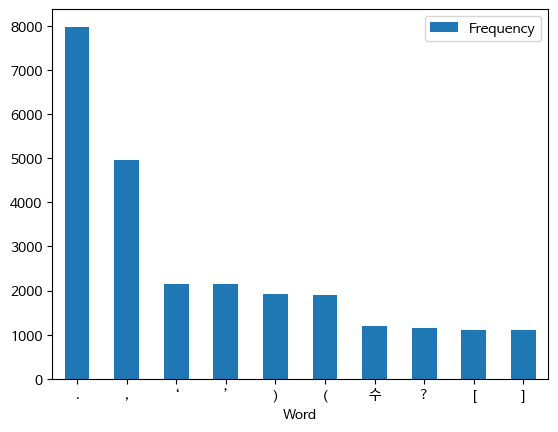

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(list(freq_dist.items()), columns = ["Word","Frequency"])
df = df.nlargest(columns="Frequency", n = 10)  # Top 10 words with highest frequencies

plt.figure(figsize=(12,8))
ax = df.plot.bar(x='Word', y='Frequency', rot=0)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 1200x800 with 0 Axes>

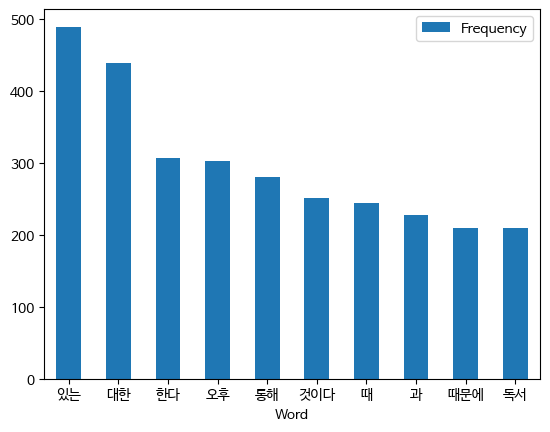

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define stopwords to be removed
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '이유','있다','그','할','에서','것은','것을','한','에','0','수','의','알','이','는','가','오답이','오답인','정답이','정답인','답','나','를','을']) # add your custom stopwords

# Remove stopwords and any tokens that are just punctuation
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Compute frequency distribution
filtered_freq_dist = FreqDist(filtered_tokens)

# Create a dataframe from the frequency distribution and plot it
filtered_df = pd.DataFrame(list(filtered_freq_dist.items()), columns = ["Word","Frequency"])
filtered_df = filtered_df.nlargest(columns="Frequency", n = 10)  # Top 10 words with highest frequencies

plt.figure(figsize=(12,8))
ax = filtered_df.plot.bar(x='Word', y='Frequency', rot=0)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 1200x800 with 0 Axes>

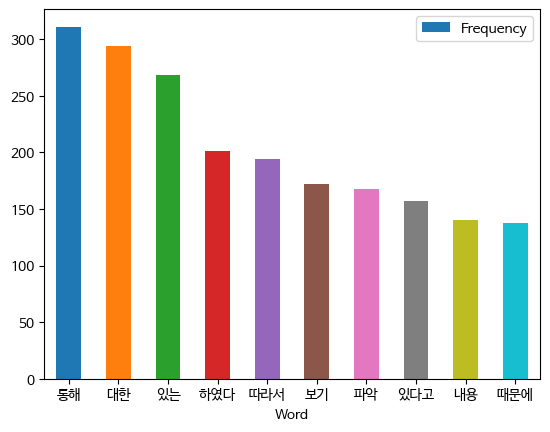

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define stopwords to be removed
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '이유','있다','그','할','에서','것은','것을','한','에','0','수','의','알','이','는','가','오답이','오답인','정답이','정답인','답','나','를','을']) # add your custom stopwords

# Remove stopwords and any tokens that are just punctuation
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Compute frequency distribution
filtered_freq_dist = FreqDist(filtered_tokens)

# Create a dataframe from the frequency distribution and plot it
filtered_df = pd.DataFrame(list(filtered_freq_dist.items()), columns = ["Word","Frequency"])
filtered_df = filtered_df.nlargest(columns="Frequency", n = 10)  # Top 10 words with highest frequencies

plt.figure(figsize=(12,8))

# Use the 'tab10' colormap to get pastel-like colors
colors = plt.get_cmap('tab10')

ax = filtered_df.plot.bar(x='Word', y='Frequency', rot=0, color=colors.colors)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 1200x800 with 0 Axes>

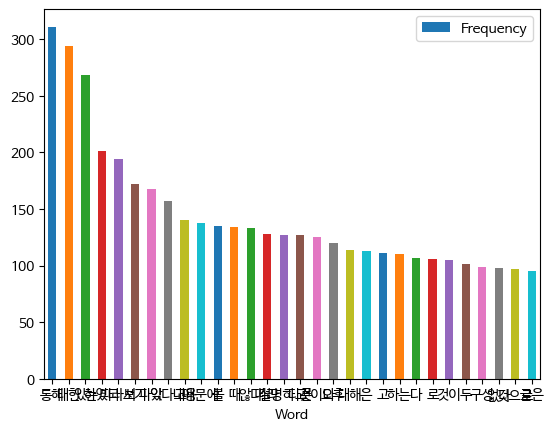

In [ ]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Extract text
text = extract_text_from_pdf(file_path)

# Tokenization
tokens = word_tokenize(text)

# Normalization (convert to lower case)
normalized_tokens = [word.lower() for word in tokens]

# Define stopwords to be removed
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '이유','있다','그','할','에서','것은','것을','한','에','0','수','의','알','이','는','가','오답이','오답인','정답이','정답인','답','나','를','을'])

# Remove stopwords and any tokens that are just punctuation
filtered_tokens = [word for word in normalized_tokens if word not in stop_words and word.isalpha()]

# Compute frequency distribution
filtered_freq_dist = FreqDist(filtered_tokens)

# Create a dataframe from the frequency distribution and plot it
filtered_df = pd.DataFrame(list(filtered_freq_dist.items()), columns = ["Word","Frequency"])
filtered_df = filtered_df.nlargest(columns="Frequency", n = 30)  # Top 10 words with highest frequencies

plt.figure(figsize=(12,8))

# Use the 'tab10' colormap to get pastel-like colors
colors = plt.get_cmap('tab10')

ax = filtered_df.plot.bar(x='Word', y='Frequency', rot=0, color=colors.colors)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 1200x800 with 0 Axes>

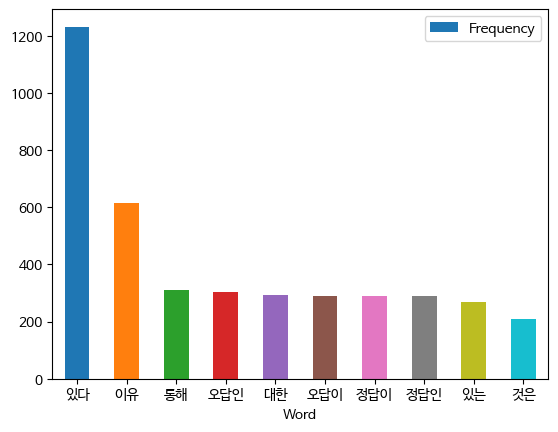

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '0','수','의','알','이','는','가']) # add your custom stopwords

# Use regular expression to extract only words
tokenizer = RegexpTokenizer(r'\b[가-힣]{2,}\b') # This will extract all words that have 2 or more characters.

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Normalize words
normalized_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

# Substitute words
substitutions = {"설명하고": "설명", "있다고": "있다", "없다": "없음"}

filtered_tokens = [substitutions.get(token, token) for token in normalized_tokens]

# Compute frequency distribution
filtered_freq_dist = FreqDist(filtered_tokens)

# Create a dataframe from the frequency distribution and plot it
filtered_df = pd.DataFrame(list(filtered_freq_dist.items()), columns = ["Word","Frequency"])
filtered_df = filtered_df.nlargest(columns="Frequency", n = 10)  # Top 10 words with highest frequencies

plt.figure(figsize=(12,8))

# Use the 'tab10' colormap to get pastel-like colors
colors = plt.get_cmap('tab10')

ax = filtered_df.plot.bar(x='Word', y='Frequency', rot=0, color=colors.colors)
plt.show()

In [ ]:
filtered_df

,Word,Frequency
29,있다,1232
161,이유,615
205,통해,311
160,오답인,304
98,대한,294
159,오답이,289
2814,정답이,289
2815,정답인,289
73,있는,268
881,것은,208


<Figure size 1200x800 with 0 Axes>

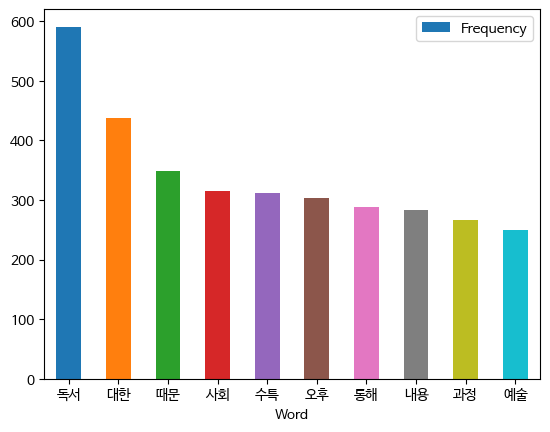

In [ ]:
from konlpy.tag import Okt

okt = Okt()

# Extract only nouns
nouns = okt.nouns(text)

# Remove single-character nouns
filtered_nouns = [noun for noun in nouns if len(noun) > 1]

# Compute frequency distribution
freq_dist = FreqDist(filtered_nouns)

# Create a dataframe from the frequency distribution and plot it
df = pd.DataFrame(list(freq_dist.items()), columns = ["Word","Frequency"])
df = df.nlargest(columns="Frequency", n = 10)  # Top 10 words with highest frequencies

plt.figure(figsize=(12,8))

# Use the 'tab10' colormap to get pastel-like colors
colors = plt.get_cmap('tab10')

ax = df.plot.bar(x='Word', y='Frequency', rot=0, color=colors.colors)
plt.show()

In [ ]:
from konlpy.tag import Okt
import pandas as pd
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

okt = Okt()

# 불용어 리스트 생성
stopwords = ["수특","정답","독서","수능특강","문단","대한","때문","통해"]

# Extract only nouns
nouns = okt.nouns(text)

# Remove single-character nouns and stopwords
filtered_nouns = [noun for noun in nouns if len(noun) > 1 and noun not in stopwords]

# Compute frequency distribution
freq_dist = FreqDist(filtered_nouns)

# Create a dataframe from the frequency distribution and plot it
df = pd.DataFrame(list(freq_dist.items()), columns = ["Word","Frequency"])
df = df.nlargest(columns="Frequency", n = 10)  # Top 10 words with highest frequencies

<Figure size 1200x800 with 0 Axes>

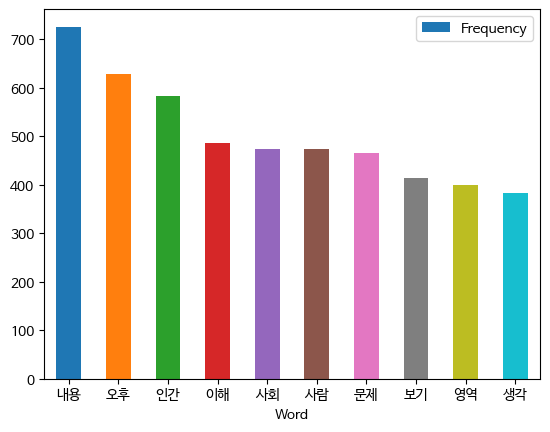

In [ ]:
plt.figure(figsize=(12,8))

# Use the 'tab10' colormap to get pastel-like colors
colors = plt.get_cmap('tab10')

ax = df.plot.bar(x='Word', y='Frequency', rot=0, color=colors.colors)
plt.show()

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 123088 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

AttributeError: ignored

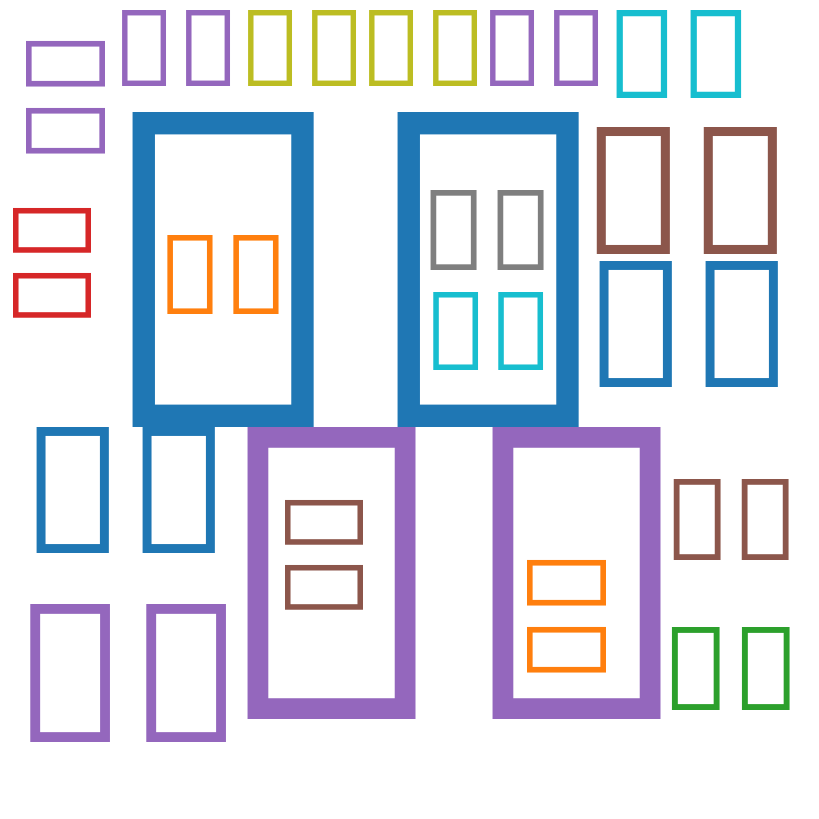

In [ ]:
from wordcloud import WordCloud

# 상위 20개 단어만 추출
df = pd.DataFrame(list(freq_dist.items()), columns = ["Word","Frequency"])
df = df.nlargest(columns="Frequency", n = 20)  # Top 20 words with highest frequencies

# Create a word frequency dictionary from the dataframe
word_freq = df.set_index('Word').to_dict()['Frequency']

# Create a Word Cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      max_words=20,
                      colormap='tab10',
                      random_state=1).generate_from_frequencies(word_freq)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

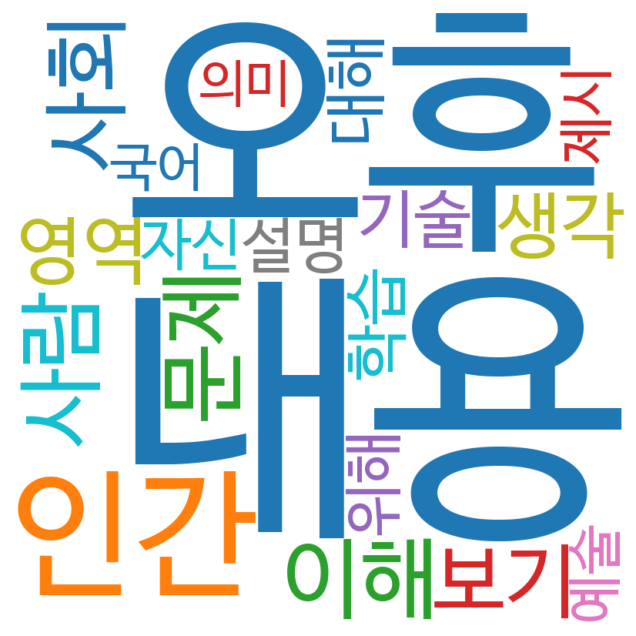

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path=path,  # 한국어 폰트 경로
    background_color='white',
    max_words=20,
    colormap='tab10',
    width=800,
    height=800
).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from konlpy.tag import Okt
import pandas as pd
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

okt = Okt()

# 불용어 리스트 생성
stopwords = ["수특","정답","독서","수능특강","문단","대한","때문","통해"]

# Extract only nouns
nouns = okt.nouns(text)

# Remove single-character nouns and stopwords
filtered_nouns = [noun for noun in nouns if len(noun) > 1 and noun not in stopwords]

# Compute frequency distribution
freq_dist = FreqDist(filtered_nouns)

# Create a dataframe from the frequency distribution and plot it
df = pd.DataFrame(list(freq_dist.items()), columns = ["Word","Frequency"])
df = df.nlargest(columns="Frequency", n = 200)  # Top 10 words with highest frequencies

In [ ]:
df_100 = df.nlargest(columns="Frequency", n = 200)  # Top 10 words with highest frequencies
df_100.to_excel('df_2020~2024 독서_200.xlsx')

In [ ]:
# import requests
# import pandas as pd
# import json

# client_id = "NpIf3WkLPLrgfGasnbdi"
# client_secret = "f2FVPcz8Y0"

# def get_dictionary_definition(word):
#     url = f"https://openapi.naver.com/v1/search/encyc.json?query={word}"

#     headers = {
#         'X-Naver-Client-Id': client_id,
#         'X-Naver-Client-Secret': client_secret,
#     }

#     response = requests.get(url, headers=headers)

#     if response.status_code == 200:
#         jdict = json.loads(response.text)
#         if jdict['items']:
#             return jdict['items'][0]['description']
#         else:
#             return None
#     else:
#         print("Error Code:", response.status_code)

# df['Dictionary_Definition'] = df['Word'].apply(get_dictionary_definition)